# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [8]:
using Clustering, CSV, DataFrames, Gadfly

## 讀取資料

In [2]:
data = CSV.read("s1-set.csv")

┌ Warning: `CSV.read(input; kw...)` is deprecated in favor of `using DataFrames; CSV.read(input, DataFrame; kw...)
│   caller = read(::String) at CSV.jl:40
└ @ CSV C:\Users\user\.julia\packages\CSV\MKemC\src\CSV.jl:40


5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [3]:
X = Matrix(data[:, 1:2])'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

## K-means 分群模型

In [4]:
k = 15
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([418183.09523809527 798119.0953846154 … 139395.22898550724 822688.984423676; 786581.8253968254 322213.7753846154 … 558143.9420289855 730558.5482866043], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8  …  6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [7.31560501379248e9, 8.493277400597412e9, 8.709780756329102e9, 4.683186004255859e9, 1.612086740425586e10, 6.069402756841309e9, 4.832043515719238e9, 8.371134236231445e9, 2.7993041428413086e9, 8.372858212402344e9  …  2.782454939169922e8, 5.595652414916992e9, 2.9773947540195312e9, 1.2777467247363281e8, 4.674976160428711e9, 1.0817732159863281e8, 4.381570026557617e8, 4.130407882919922e8, 5.097647169803223e9, 5.81265660621582e8], [315, 325, 340, 130, 350, 352, 327, 615, 329, 352, 354, 334, 211, 345, 321], [315, 325, 340, 130, 350, 352, 327, 615, 329, 352, 354, 334, 211, 345, 321], 1.3529192572508107e13, 19, true)

## 取得分群和群心

In [6]:
data[!, :cluster] = string.(assignments(result))
result.centers

2×15 Array{Float64,2}:
 418183.0  798119.0  320603.0  230770.0  …  253209.0  139395.0  822689.0
 786582.0  322214.0  161522.0  873745.0     831560.0  558144.0  730559.0

## 視覺化分群結果

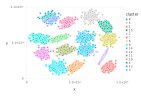

In [9]:
plot(data, x = "x", y = "y", color = "cluster", Geom.point)